<a href="https://colab.research.google.com/github/Bloch-AI/BlochAI-PythonProgrammingforAI/blob/master/MultiHeadAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Represent the Input**

In [ ]:
#First import the libraries we need
import numpy as np
from scipy.special import softmax

In [ ]:
print("Step 1: Input : 3 inputs, d_model = 4")
x= np.array( [[1.0, 0.0, 1.0, 0.0],         # Input 1
           [0.0, 2.0, 0.0, 2.0],            # Input 2
            [1.0, 1.0, 1.0, 1.0]])          # Input 3
print (x)
#The three inputs are word vectors

Step 1: Input : 3 inputs, d_model = 4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


The first step of our model is ready.

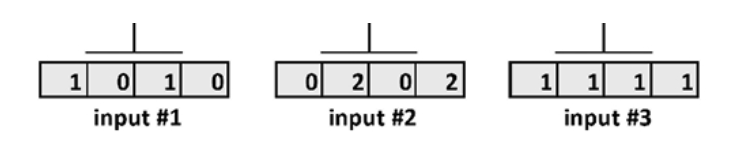


# **Step 2: Initializing the weight matrices**

Each input has three weight matrices:
Qw to train the queries;
Kw to train the keys;
Vw to train the values.

The weight matrices will just be 3 dimensions, dk =3

The three weight matrices are initialized strating with the query weight matrix.

In [ ]:
print ("Step 2: weights 3 dimensions x d_model=4")
print ("w_query")

Step 2: weights 3 dimensions x d_model=4
w_query


In [ ]:
print("w_query")
w_query = np.array ([[1, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 1]])
print (w_query)

w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


Next the key weight matrix:

In [ ]:
print("w_key")
w_key = np.array ([[0, 0, 1],
                   [1, 1, 0],
                   [0, 1, 0],
                  [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


Next the value weight matrix

In [ ]:
print("w_value")
w_value = np.array ([[0, 2, 0],
                   [0, 3, 0],
                   [1, 0, 3],
                  [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


The second step of our model is ready.

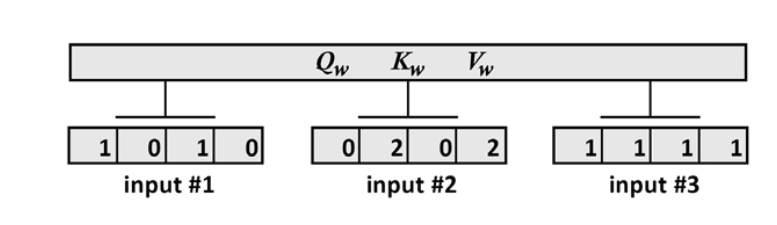

# **Step 3: Matrix mulitplication to obtain Q, K, V**

We will now multiply the input vectors by the weights to obtain a query, key, and value vector for each input.

Let's first multiply the input vectors by the w-query weight matrix

In [ ]:
print ("Step 3: Matrix multiplication to obtain Q,K,V")
print("Query: x* w_query")
Q =np.matmul (x, w_query)
print (Q)

Step 3: Matrix multiplication to obtain Q,K,V
Query: x* w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


We now multiply the input vectors by the w_key weight matrix


In [ ]:
print ("Key: x * w_key")
K = np.matmul (x, w_key)
print (K)

Key: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


We obtain a vector for K1 = [0, 1, 1], K2 [4, 4, 0] and K3 = [2, 3, 1]

Finally multiply the input vectore by the W_value Weight matrix

In [ ]:
print ("Value: x* w_value")
V= np.matmul(x, w_value)
print(V)

Value: x* w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


We have the Q, K, V values. We need to caculate the attention scores

# **Step 4: Scaled attention scores**

The attention head now implements the original Tranformer equation.

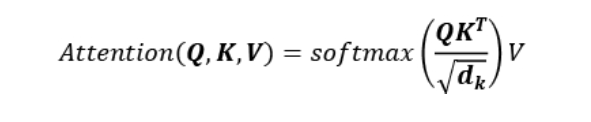

In this example square root of three is rounded down to 1

Step 4 concentrates on 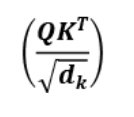

In [ ]:
print("Step 4:  Scaled Attention Scores")
k_d =1  # square root of Dk rounded down to 1 in this example
attention_scores = (Q @ K.transpose())/k_d
print (attention_scores)

Step 4:  Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


Step 4 is now complete. For example, the score for x1 is [2,4,4] across the K vectors across the head as displayed:

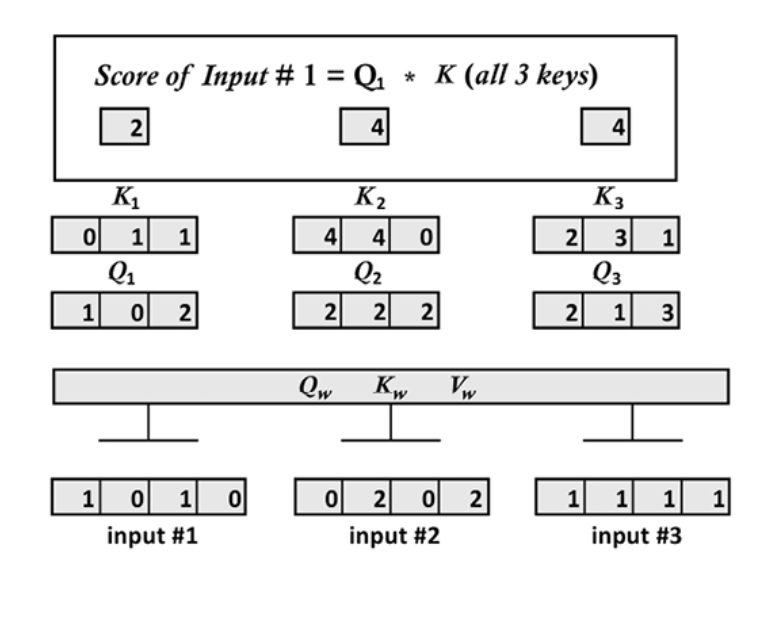

The attention equation will now apply softmax to the intermediate scores for each vector.

# **Step 5: Scaled softmax attention scores for each vector**

We now apply a softmax function to each intermediate attention score.  Instead of doing a matrix multiplication, let's zoom down to each individual vector:

In [ ]:
print("Step 5: Scaled softmax attention_score for each vector")
attention_scores[0] = softmax(attention_scores[0])
attention_scores[1] = softmax(attention_scores[1])
attention_scores[2] = softmax (attention_scores[2])
print (attention_scores[0])
print (attention_scores[1])
print (attention_scores[2])

Step 5: Scaled softmax attention_score for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


Step 5 is now complete. For example, the softmax of the score of X1 for all the keys is:

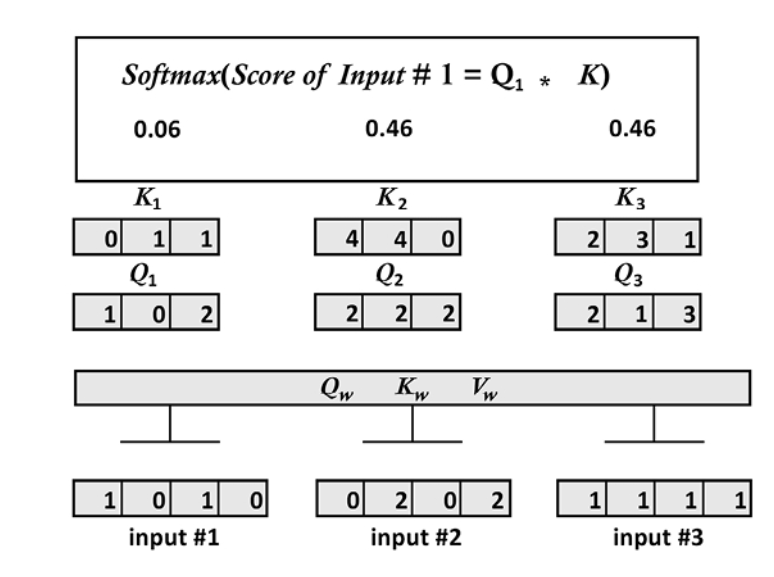

We can now calculate the final attention values with the complete equation

# **Step 6 : The final attention representations**

We can now finalise the attention equation by plugging V in

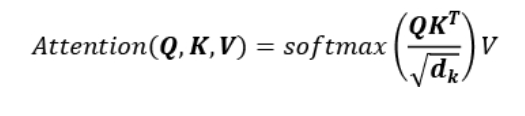

We wil calculate the attention score first for just one word, X1

print("Step 6: attention value obtained by score1/k_d*V2)
print(V[0])
print(V[1])
print(V[2])
print("Attention1")
attention1 = attention_score[0].reshape(-1,1)
attention1 = attention_score[0]
[0]*V[0]
print(attention1)
print("Attention 2")
attention2 = attention_scores[0]
[1]*V[1]
print(attention2)
print("Attention 3")
attention3= attention_scores[0][2]*V[2]
print(attention3)


print("Step 6: attention value obtained by score1/k_d*V2)
print(V[0])
print(V[1])
print(V[2])
print("Attention1")
attention1 = attention_score[0].reshape(-1,1)
attention1 = attention_score[0]
[0]*V[0]
print(attention1)
print("Attention 2")
attention2 = attention_scores[0]
[1]*V[1]
print(attention2)
print("Attention 3")
attention3= attention_scores[0][2]*V[2]
print(attention3)


In [ ]:
print("Step 6:  attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1 = attention_scores[0].reshape(-1,1)
attention1 = attention_scores[0][0]*V[0]
print(attention1)
print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)
print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6:  attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


Step 6 is complete. The 3 attentions values for X1 have been calculated.
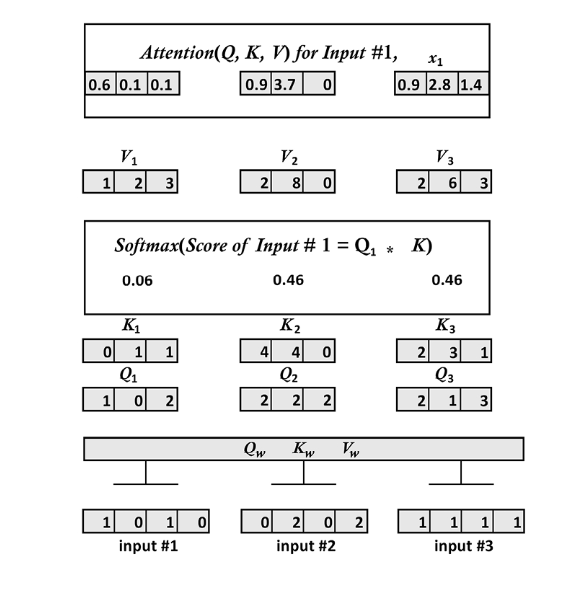

The attention values now need to be summed up

In [ ]:
print("Step 7: sum the results to create the first line of the output matrix")
attention_input1 = attention1 +attention2 +attention3
print(attention_input1)

Step 7: sum the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


The output is the first line of the output matrix. We can see the summed attention value for X1 below:

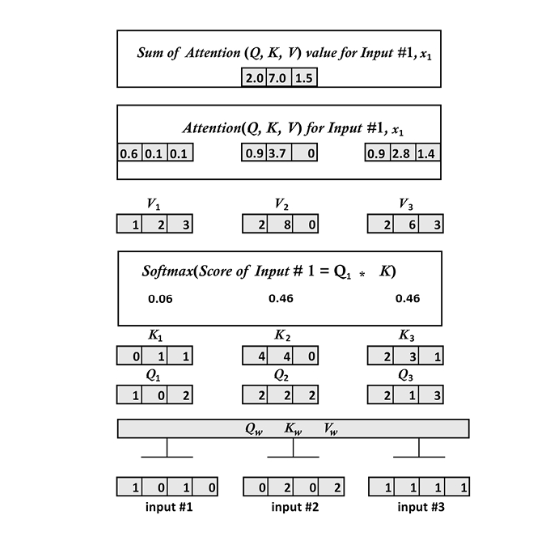

We have completed the steps for input #1. Steps 6 and 7 would need to be repeated for  input #2 and input #3.

# **Step 8: Steps 1 to 7 for all the inputs**

Now we will assume we have 3 attention values with learns weight dmodel = 64.  We have  seen the attention representation process with a small model.  Let's go directly to thecresults and assume we have generated the 3 attention representation with a dmodel = 64.

In [ ]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
attention_head1 = np.random.random ((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.76588916 0.36599836 0.9350789  0.55062372 0.44830683 0.05945493
  0.27040285 0.63473918 0.78748422 0.81417915 0.337458   0.46967849
  0.81583038 0.14710787 0.23218867 0.96413591 0.55555654 0.48211727
  0.06304156 0.03384676 0.76362366 0.07190939 0.01657731 0.6285927
  0.14825128 0.64322767 0.140943   0.24346813 0.95485076 0.83342521
  0.27503503 0.61913826 0.95805347 0.88745889 0.72157784 0.77139088
  0.89949225 0.31869553 0.84588757 0.96587077 0.94175977 0.01575764
  0.16697627 0.0832594  0.03588205 0.79596083 0.67819558 0.6021647
  0.69341469 0.95985002 0.55758422 0.54114499 0.21384769 0.05928084
  0.53223958 0.55244407 0.07034705 0.95283271 0.85646735 0.86518559
  0.29198533 0.98999185 0.9855054  0.90806427]
 [0.87817131 0.28669915 0.63385519 0.37561366 0.01735112 0.72362966
  0.55786312 0.56926432 0.67877189 0.67419275 0.15673547 0.10094694
  0.87219584 0.3335375  0.95467538 0.71965793 0.51534037 0.17329786
  0.38376087 0.45319842 0.0305735

# Step 9: The output of the heads of the attention sublayer

We assume that we have trained the 8 heads of the attention sublayer. The transformer now has 3 output vectors of dmodel = 64 dimensions each:

In [ ]:
print("Step 9: We asumme we have trained the 8 heads of the attention sublayer")
z0h1 = np.random.random((3,64))
z1h2 = np.random.random((3,64))
z2h3 = np.random.random((3,64))
z3h4 = np.random.random((3,64))
z4h5 = np.random.random((3,64))
z5h6 = np.random.random((3,64))
z6h7 = np.random.random((3,64))
z7h8 = np.random.random((3,64))
print("shape of one head", z0h1.shape, "dimension of 8 heads, 64*8")

Step 9: We asumme we have trained the 8 heads of the attention sublayer
shape of one head (3, 64) dimension of 8 heads, 64*8


# Step 10: Concatentation of the output of the heads

The Transformer concatenates the 8 elements of Z

In [ ]:
print("Step 10: Concatenation of the heads 1 to 8 to obtain the original 8x64 =512 output dimension of the model")
output_attention = np.hstack ((z0h1, z1h2, z2h3, z3h4, z4h5, z5h6, z6h7, z7h8))
print (output_attention)

Step 10: Concatenation of the heads 1 to 8 to obtain the original 8x64 =512 output dimension of the model
[[0.99307888 0.77052518 0.48028152 ... 0.76026761 0.0020627  0.40956836]
 [0.69682889 0.33233759 0.46436339 ... 0.02638983 0.46796107 0.72636501]
 [0.84445254 0.33813816 0.47128624 ... 0.65046907 0.33289326 0.12410643]]


# Exercise

Go back to the small model and complete steps  6 and 7 for input #2 and  input #3.  Then create a 4  x 3 matrix such that each row represents a word and  hte colimns are Q, K and V summations.

Note thta the attention model here  in the text is called the original transformer model and was the poposal in the Vaswani et al (2017) paper "Attention is all you need"